In [3]:
# executed in 8ms, finished 21:39:53 2024-04-16

$$\require{cancel}$$


In [32]:
plt.rcParams.update({
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

# The T-Test

At the end of this lecture, you will be able to do the following:

- Identify situations in which you cannot use the Wald test

- Use the T-test to when sample sizes are small

- Perform T-tests at fixed levels and compute exact p-values

Understand the chi-squared distribution and the Student's t distribution and how they relate to the Gaussian distribution

У теста Wald есть много гибкости. В отличии от CI нам не нужно знать форму распределения. Можно построить тест для всех 3х типов теста, можно подсчитать p-value. Его можно использовать и для двух выборок. 
Это очень удобный тест.

Его проблема в том что он опирается на асимптотическое утверждение. Чтобы вывести это утверждение, главный ингредиент Wald's test'а, мы использовали CLT и Слуцкий или может Delta Method. И это было главным для wald test's.

Но часто бывает так, что мы имеет дело с маленькими выборками. К примеру когда мы имеем дело с клиническими испытаниями. мы начинаем с маленькой группы людей, пред-клинические тесты, в которых в рамках лаборатории испытывается молекула. Потому переходит в ранние клинические испытания. Мы будем говорить что первую и перво-вторую стадии, которые больше занимаются вопросом безопасноти и наличия эффекта. 
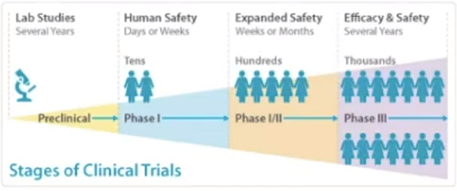

Мы конечно хотим найти статистически значемые эффекты. Конечно если у вас маленькие выборки, мы должны быть более консервативные когда мы отвергаем нуль гипотезу, потому что наличие эффекта может быть из-за маленькой выборки и большей дисперсии.
Мы не можем использовать CLT или теор. Слуцкого, все эти асимптотические утверждения, они расчитаны на выборки размером 40 или 50 или больше.

Но мы всеравно сможем провести тест , примеру размером 3, но при этом нужно понимаю - **магии не будет**, нам всеравно нужно делать какие-то предположения.

Чтобы понять какие предположения, давайте вспомним как мы использовали Central Limit Theorem, как мы использовали Delta Method? Причина по которой мы использовали эти асимптотические утверждения, это потому что хотели заявить что хотябы асимптотически распределение статистики нашего теста нормальное. 

Итак что мы будем делать, мы не будем упавать на асимптотические утверждения, такие как CLT, которые позволяют нам говорит о нормальности наших статистик, мы просто сразу **предположим** для нашей небольшой выборки распределены нормально. Это Предположение не решает всех проблем. Это только решает проблему относительно избавляения от CLT.\
**T-Test** , то что мы будем обсуждать, еще нуждается в замене теор. Слуцкого, которую мы тоже не может применять.

Вспомним что\
 $$\fbox{Definition 6.7 A point estimator $\hat\theta$ of a parameter $\theta$ is consisten if $\hat\theta_n\xrightarrow[n\to\infty]{P}\theta$}$$\
Сходимость в вероятности.
[All of the statistics . p 90]


# 3. A first example


Предположим, мы хотим установить дома ветрогенератор. Согласно рекомендациям государства, минимальная сила ветра должна быть 18 км/ч для эффективной работы турбины.

Так как это дорогое вложение денег мы решили замерять в течении года силу ветра. Для проверки на соответсвие этому условию мы решили измерять скорость ветра в течение года. Раз в месяц к нам приезжает специализированная машина, которая в течение дня проводит замеры. Данные замеров мы предполагаем независимыми и одинаково распределёнными (i.i.d.), хотя возможна и сезонная вариабельность. Так как магии не будет, мы просто предположим что они iid. 
$$X_1,\dots,X_n\stackrel{\text{iid}}\sim\mathcal{N}(\mu,\sigma^2)$$
мы конечно не специалисты по ветрам, но мы знаем статистику. Мы точно  хотим чтобы $\mu>18$ км\ч. а вот $\sigma^2$ nuisance parameter - мы его пока что не знаем, но мы хотим понимать флуктуации.

**Постановка Вопроса Гипотезы**\
$H_0\leq18$ - скорость ветра не достигает необходимого уровня.\
$H_1>18$ - скорость ветра превышает минимально необходимый порог.

Мы хотим найти доказательства в наших данных, чтобы показать, что силы ветра достаточно для установки ветрогенератора. Типичная практика к установке теста это построить нашу гипотезу так, что мы не видим никакого эффекта и нет никакой разницы относительно нулевой гипотезы. Когда наша нулевая гипотеза говорит что нет эффекта - значит мы выставляем условия эксперимента так, что мы требуем достаточно доказательств, чтобы отвергнуть нуль гипотезу. Можно еще сказать что мы стараемся свести вероятность ошибки первого рода к минимуму, где мы ошибочно отвергаем нулевую гипотезу. 

Этот подход к отклонению нулевой гипотезы часто является **преднамеренным** в научных исследованиях, чтобы избежать заявлений о наличии эффектов или различий, которые на самом деле не подтверждены данными. Это подход, который ценит уверенность и минимизирует риск сделать неверные выводы из случайных колебаний данных или недостаточных доказательств.

**Что же не так в нашем эксперименте?**

Проблема нашего примера в том что нам нужно оценить $\sigma^2$. Оценка дисперсии требует точности, так как от неё зависит статистическая значимость результатов. Заметим что нам не нужна CLT так как мы изначально предполагаем что данные имеет гаусово распределение. Тогда если нам будет известна $\sigma^2$ мы сможем получить $$\sqrt{n}\dfrac{\bar{X}_n-\mu}{\sigma}\sim\mathcal{N}(0,1)\quad\quad(1)$$

для $\mu=18$ из гипотезы. $\bar{X}_n$ это среднее из выборки. А как нам оценить $\sigma^2$? нам нужна оценки.

Проблема в том что если мы хотим получить consistent estimator $\hat\sigma^2$ нам для этого нужно применить **теор. Слуцкого, которая не применима к маленьким выборкам.**

Однако у меня есть оценщик дисперсии, очень естественный (натуральный) оценщик, который зависит от данных и который является Гуассовым. Так что если наши данные Гауссовы, мы даже сможем сказать - какое распределение оценки дисперсии.

Вместо того чтобы брать MLE для $\sigma$ мы возьмем **не несмещённый  оценщик** для $\sigma^2$, который нам говорит, что вместо того чтобы смотреть на средник квадрат разницы от среднего данных. мы заменим $n$ на $n-1$

$$S_n^2=\dfrac{1}{n-1}\sum_{i=1}^n(X_i-\bar{X}_n)^2$$

Когда мы оценивает дисперсию стат методом MLE, мы оценивает насколько вероятно получить данные при заданных параметрах модели. Обычно MLE эффективно (имеет наименьшую возможную дисперсию среди всех несмещенных оценок), но оценки MLE могут быть смещены при малых размерах выборки.
$\sigma_\text{MLE}^2=\frac{1}{n}\sum_{i=1}^n(X_i-\overline{X}_n)^2$. Это оценка дисперсии смещена, потому что в дисперсии используется знаменатель $n$, что делает оценку дисперсии **ниже** истинного значение дисперсии генеральной совокупности, особенно при малых выборках.
Смещение еще возникает из-за использования в качестве средней $\bar{X}_n$ которая сама подсчитана из данных, что смещяет оценку дисперсии - уменьшает вариативность измерений. Поэтому когда мы делим на $n$ мы не учитывает эту зависимость между данными, что приводит к занижению оценки дисперсии. 

Использование $n-1$ [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction) в знаменателе позволяет скоректировать этот эффект, дела оценку несмещенной. Это увеличивает результат деления, что приводит к увеличению дисперсии, делаю наше оценку более консервативной.

<!-- ![image.png](attachment:image.png) -->
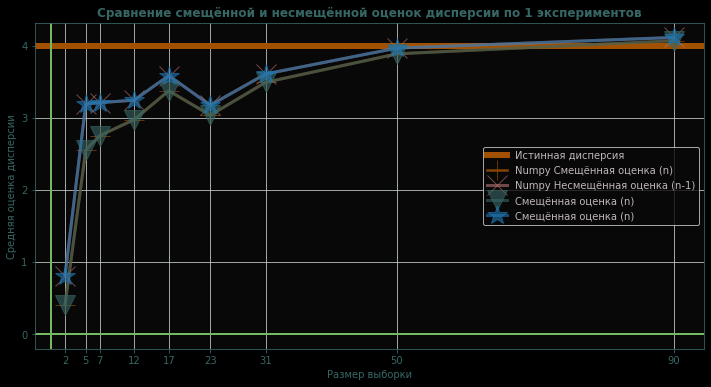

<!-- ![image-2.png](attachment:image-2.png) -->
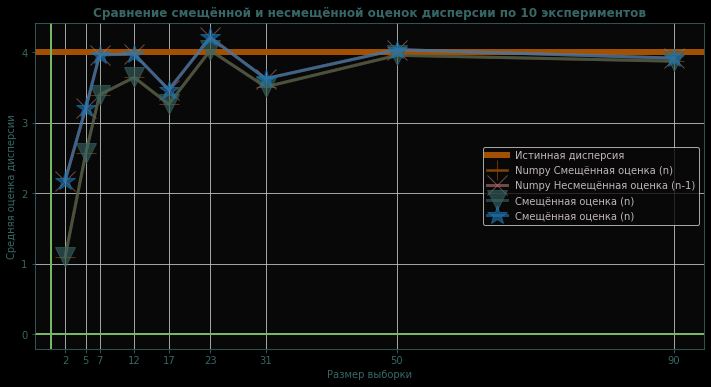

<!-- ![image-3.png](attachment:image-3.png) -->
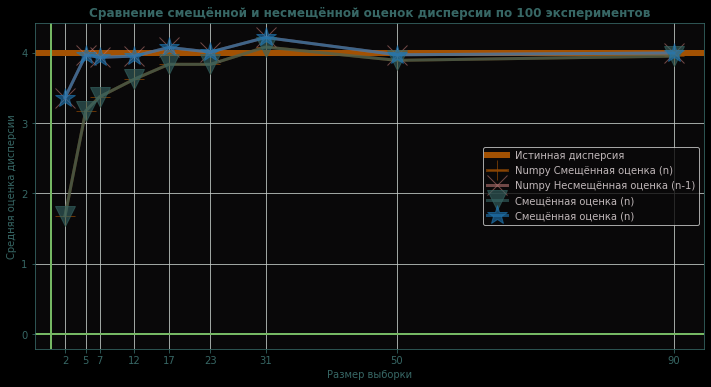

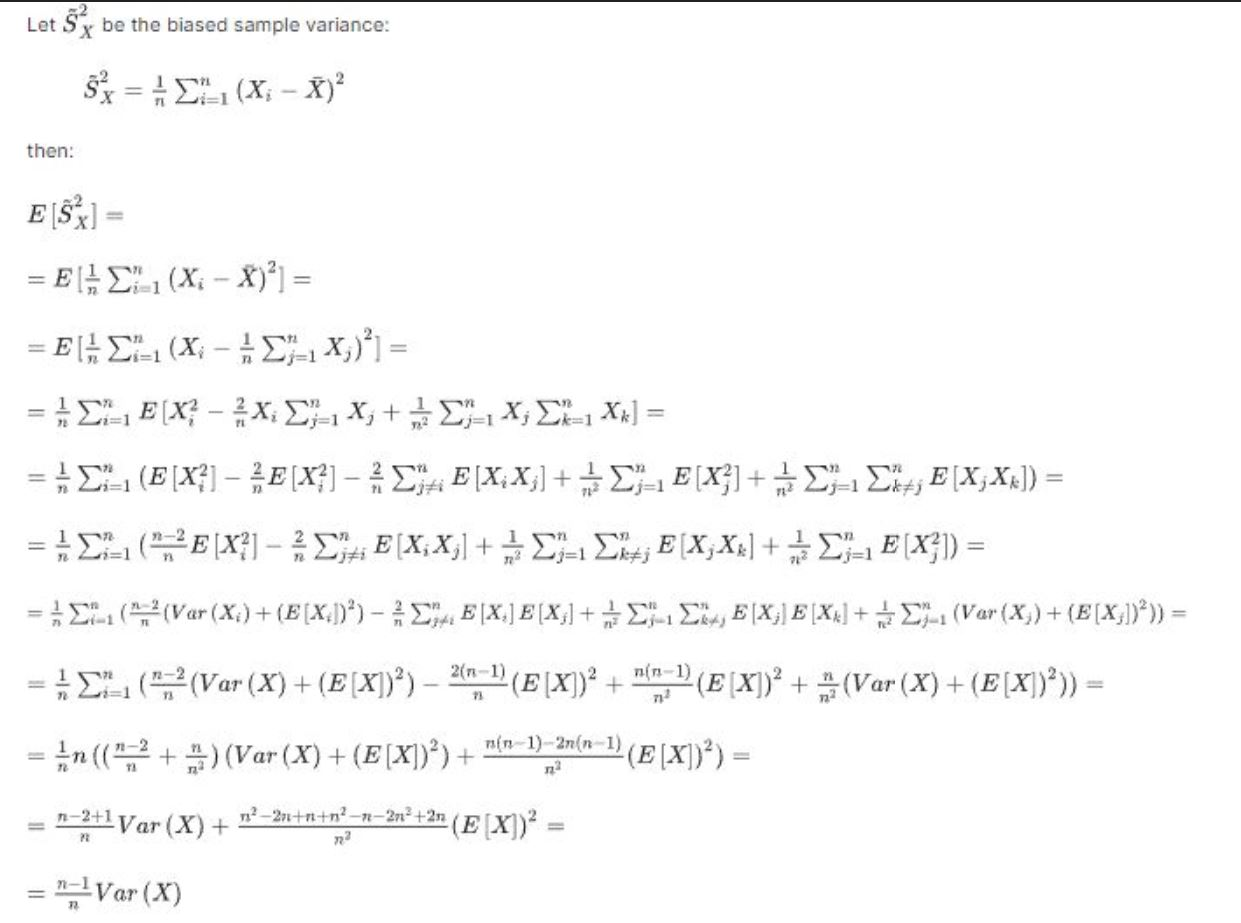

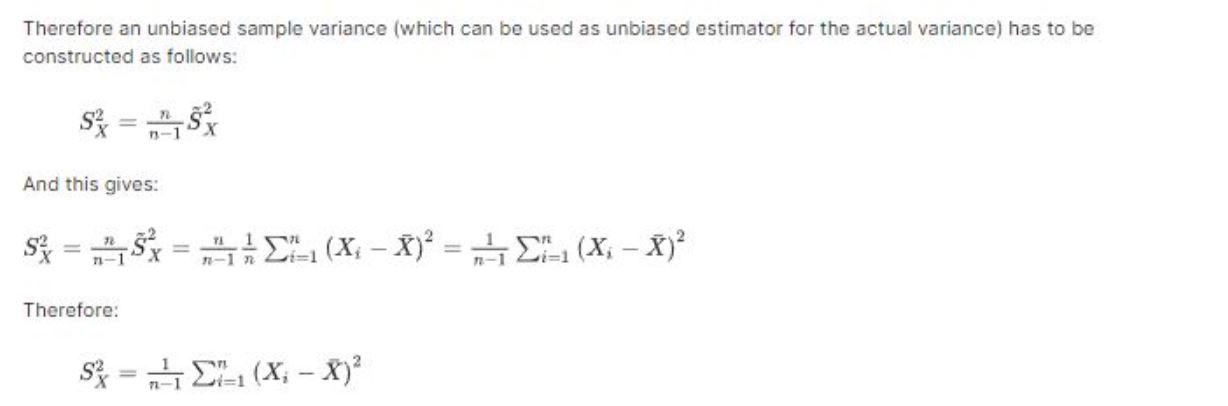

Если мы подсчитаем ожидаемое значние $S_n^2$ то $\mathbb{E}[S_n^2]=\sigma^2$ а если мы будет считать $\mathbb{E}[\sigma_\text{MLE}^2]=\dfrac{n-1}{n}\sigma^2$

Взгляним на
$$S_n^2=\dfrac{1}{n-1}\sum_{i=1}^n(X_i-\bar{X}_n)^2$$

в нем $X_i$ - Гауссово, $\bar{X}_n$ среднее Гауссовых, и раз мы знаем что наше оценка дисперсии полностью состоит из Гауссовых - то мы может предположить поведение распределения оценки дисперсии без того чтобы обращаться к каким либо ассимптотическим утверждениям.


Мы должны осознать, что распределение будет зависить от истинного $\sigma^2$. в наших данных $X_i-\bar{X}_n$ это отклонение от среднего при том что истинная дисперсия равна $\sigma^2$. Если $\sigma^2$ на самом деле в два раза больше, тоесть $2\sigma^2$, тогда среднее увеличение разброса от среднего будет в $\sqrt{2}$. Масштабы наших данных имеют эффект на распределения оценки.

Чтобы избавиться от этого "влияния" мы не будет говорить о $S_n^2$ напрямую. мы будет говорить о $\sqrt{\dfrac{S_n^2}{\sigma^2}}$. мы изменим нашу формулу $(1)$, поделив числитель и знаменатель на $\sigma^2$

$$\sqrt{n}\dfrac{\bar{X}_n-\mu}{S_n}=\dfrac{\color{orange}{\sqrt{n}\dfrac{\bar{X}_n-\mu}{\sigma}}}{\color{blue}{\sqrt{\dfrac{S_n^2}{\sigma^2}}}}$$

то что у нас **оранжевое - это нормальное распределение.** \
то что **синее - какое у него распределение?** получается что мы как будто избавили от это дроби вообще. потому что если посмотреть как с читается $S_n^2$ и $\sigma_2$ то получается что "оно не зависит от не известного параметра."

$\dfrac{\dfrac{1}{n-1}\sum_{i=1}^n(X_i-\bar{X}_n)^2}{\dfrac{1}{n}\sum_{i=1}^n(X_i-\mu)^2}$


$$\sqrt{n}\dfrac{\bar{X}_n-\mu}{S_n}=\dfrac{\color{orange}{\sqrt{n}\dfrac{\bar{X}_n-\mu}{\sigma}}}{\color{blue}{\sqrt{\dfrac{S_n^2}{\sigma^2}}}}$$

# 4. The Chi-squared distribution

---

> Почему вообще нам важно чобы данные были Гауссовыми?
>зачем нам вообще нужно знать распределени едля проведения теста? Почему мы не можеи использовать какое-то другое распределение?
> Все что нам нужно от распределения это получить значение квантиля чтобы делать стат. выводы. нам нужно распределение которая дает квантили, и не обязательно чтобы оно было только гаусовым.

---

${\sqrt{\dfrac{S_n^2}{\sigma^2}}}\sim\chi^2$ 

**Kai-squared **

$\chi_k^2$ параметрезируется позитивным целым $k$ - называется число степеней свободы.
[Law of the random variable](https://math.stackexchange.com/questions/1397427/existence-of-the-law-of-a-random-variable) $Z_1^2+Z_2^2+\dots+Z_k^2\sim\chi_k^2$ где $Z_1,\dots,Z_l\stackrel{\text{iid}}\sim\mathcal{N}(0,1)$ . 

Пример Если $Z\sim\mathcal{N}_k(0,I_k)$ тогда $\|Z\|_2^2=Z_1^2+\dots+Z_k^2\sim\chi_k^2$

- тут значит что $Z$ - это вектор из $Z_i\stackrel{\text{iid}}\sim\mathcal{N}(0,1)$ c $k$ координатами\
$Z=\begin{bmatrix}
Z_1\\
\dots\\
Z_k
\end{bmatrix}$
-  $\|Z\|_\color{red}{2}^2$ - тут двойка обозначает что мы ищем евклидову норму.

Суть в тои что мы будем части видеть $\chi_k^2$ распределения потому что ка как только мы начинаем измерять расстояние из Гауссовых переменных. 

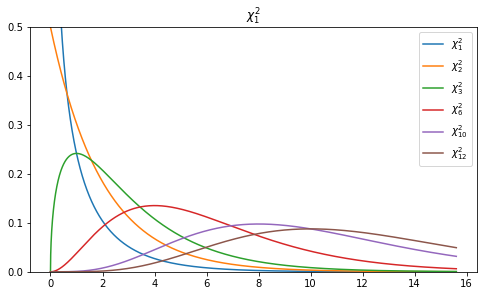

мы увеличивае число степеней свободы, и таки образом смещается средняя и еще видно что увеличивается дисперсия.

Если $V\sim\chi_k^2$ тогда:
$$\mathbb{E}[V]=\mathbb{E}\left[\sum_{i=1}^kZ_i^2\right]=\sum_{i=1}^k\mathbb{E}[Z_i^2]=k$$

При условии что $Z_i$ независимые
$$\text{var}[V]=\text{var}\left[\sum_{i=1}^kZ_i^2\right]=\sum_{i=1}^k\text{var}[Z_i^2]=k\left(\mathbb{E}[Z^{2+2}]-(\mathbb{E}[Z^2])^2\right)=k(3-1)=2k$$\
$\quad(\mathbb{E}[Z^2])^2=1$\
$\quad\mathbb{E}[Z^4]=3$ (по таблице моментов для Гауссовой переменной)


$$\mathbb{E}[V]=k$$
$$\text{var}[V]=2k$$

2k - объясняет почему увеличивается дисперсия при увеличении числа степеней свободы.

**Пример**

допустим $X_1,\dots,X_n\stackrel{\text{iid}}\sim\mathcal{N}(0,\sigma^2)$ и $V_n=\dfrac{1}{n}\sum_{i=1}^nX_i^2$ - это выборка второго момента. Для подходящей детерменистической константы $a$, которая зависит он $n$ и $\sigma^2$ и от целого числа $k$ у нас получается, что $a\cdot V_n\sim\chi_k^2$

Чему равно $a$? 

$\dfrac{n}{\sigma^2}V_n=\quad\dfrac{\cancel{n}}{\sigma^2}\dfrac{1}{\cancel{n}}\sum_{i=1}^nX_i^2\\
\quad=\sum_{i=1}^n\dfrac{X_i^2}{\sigma^2}\\
\quad=\sum_{i=1}^n\left(\dfrac{X_i}{\sigma}\right)^2$
и $X_i/\sigma\sim\mathcal{N}(0,1)$, потому что $X_i\sim\mathcal{N}(0,\sigma^2)$? соотв. $\dfrac{n}{\sigma^2}V_n\sim\chi_n^2$




**PDF $\chi_k^2$ -мы не будет использовать.**

# 5. Sample Variance and Sample Mean of IID Gaussians: Cochran's Theorem


Давайте теперь вернемся к нашей тест статистике и попытаемся понять во что она превратилась после того, как  мы заменили истинную $\sigma^2$ на $S_n^2$?\
$$\dfrac{\color{orange}{\sqrt{n}\dfrac{\bar{X}_n-\mu}{\sigma}}}{\color{blue}{\sqrt{\dfrac{S_n^2}{\sigma^2}}}}=\dfrac{\color{orange}{Z}}{\color{blue}{\sqrt{\dfrac{V}{n-1}}}}=\dfrac{\text{Gaussian Normal}}{\chi^2}$$


Вспомним что  $S_n^2=\dfrac{1}{n-1}\sum_{i=1}^n(X_i-\bar{X}_n)^2$ не смещщеная оценка дисперсии.

${\sqrt{\dfrac{S_n^2}{\sigma^2}}}\sim\chi^2$ 


**Cochran's theorem:**  -  геометрическое утверждение что происходит в пространстве гауссовых распределений.

Если $X_1,\dots,X_n\stackrel{\text{iid}}\sim\mathcal{N}(\mu,\sigma^2)$ тогда 
## 1)
$\dfrac{(n-1)S_n^2}{\sigma^2}=\sum_{i=1}^n\left(\dfrac{X_i-\bar{X}_n}{\sigma}\right)^2\sim\chi_{n\color{red}{-1}}^2$

Суть в том что у нас получается уравнение которое не содержит в себе $\mu$ а содержит в себе $\bar{X}_n$. тоесть 

$$\sum_{i=1}\dfrac{(X_i-\color{red}{\bar{X}_n})^2}{\sigma^2}\sim\chi_{n-1}^2\neq\sum_{i=1}\dfrac{(X_i-\color{red}{\mu})^2}{\sigma^2}\sim\chi_n^2$$

В итоге из-за того что мы используем среднее из наши данных, то это распределение получается имеет на одну степень свободы меньше чем есть в данных.

## 2)
$\bar{X}$ и $S_n^2$ независимые случайные пермеренные.  - это тоже самое что сказать что **числитель и знаменатель независимы друг от друга**. Потому что числитель и знаменатель содержат в себе константы и только $\bar{X}$ и $S_n^2$ являются случайными перменными в своих частях, т.е. вносят случайность в свои части выражения.

$$\dfrac{{\sqrt{n}\dfrac{\color{orange}{\bar{X}_n}-\mu}{\sigma}}}{{\sqrt{\dfrac{\color{blue}{S_n^2}}{\sigma^2}}}}=\dfrac{\color{orange}{Z}}{\color{blue}{\sqrt{\dfrac{V}{n-1}}}}$$

где $\color{orange}{Z}\sim\mathcal{N}(0,1)$ и $\color{blue}{V}\sim\chi_{n-1}^2$ и они независимы

что тут важно - мы не указали ниодного не известного параметра, один параметр Нормальная гауссова, другой - Chi2, все что меняется это $n$ но и она не зависит от $\sigma$. и это очень важно, как только мы все масштабировали, финальное число не зависит от $\mu$ или $\sigma$, для любого числа $n$ можно найти значение в таблице.

И название этому распределению **Student's t-distribution**

Мы говорили что это геометрическое утверждение, потому что на самом деле это норма в квадрате проекции Гауссового случайного вектора на $n-1$ мерное пространство из $n$ мерного пространства.

**Пример A Special Case of Cochran's Theorem I**

**Cocharan's тоерема** утверждает, что если $X_1,\dots,X_n\stackrel{\text{iid}}\sim\mathcal{N}(\mu,\sigma^2)$, тогда выборочная дисперсия $S_n^2:=\dfrac{1}{n-1}\sum_{i=1}^n(X_i-\bar{X}_n)^2$ удолветворяет:
- $\bar{X}_n$ независим от $S_n$ и 
- $\dfrac{(n-1)S_n^2}{\sigma^2}\sim\chi_{n-1}^2$

Для нашей задачи мы проверим что Cocharn's теорема утверждает когда n=2. Допустим $X_1,X_2\stackrel{\text{iid}}\sim\mathcal{N}(\mu,\sigma^2)$

Выражение $S_2^2$ можно переписать как $A^2$ где $A$ это полином в $X_1$ и $X_2$.

$S_2^2=\dfrac{1}{n-1}\sum_{i=1}^n(X_i-\bar{X}_n)^2\\
=\dfrac{1}{2-1}\left(X_1-\frac{X_1+X_2}{2}\right)^2+\left(X_2-\frac{X_1+X_2}{2}\right)^2\\
=\left(X_1-\frac{X_1}{2}-\frac{X_2}{2}\right)^2+\left(X_2-\frac{X_1}{2}-\frac{X_2}{2}\right)^2\\
=\left(\frac{X_1}{2}-\frac{X_2}{2}\right)^2+\left(\frac{X_2}{2}-\frac{X_1}{2}\right)^2\\
=\left(\frac{X_1-X_2}{2}\right)^2+\left(\frac{X_2-X_1}{2}\right)^2\\
=2\left(\frac{X_1-X_2}{2}\right)^2\\
=2\frac{(X_1-X_2)^2}{4}\\
=\frac{(X_1-X_2)^2}{2}$

$A=\pm\frac{X_1-X_2}{\sqrt{2}}$
>$(a-b)^2+(b-a)^2=\\
=a^2-2ab+b^2+\color{orange}{b}^2-2ab+\color{blue}{a}^2\\
=a^2-2ab+b^2+\color{blue}{a}^2-2ab+\color{orange}{b}^2\\
=2(a-b)^2$

$\mathbb {E}[A] = \frac{1}{\sqrt{2}}\mathbb {E}[X_1 - X_2] = \frac{1}{\sqrt{2}}(\mu - \mu ) = 0,$
$\text {Var}(A) = \text {Var}\left(\frac{X_1 - X_2}{\sqrt{2}}\right) = \frac{1}{2} (\text {Var}(X_1) + \text {Var}(X_2)) = \sigma ^2$

# 6. Student's T distribution


Давайте вспомни че мы тут собсна делаем - мы хотим турбину установить. у нас меленькая выборка и мы хотим знать распределение этого значения
$\sqrt{n}\dfrac{\bar{X}_n-\mu}{\sqrt{S_n^2}}$ которое мы потом переписали в другой вид. $\dfrac{{\sqrt{n}\dfrac{\color{orange}{\bar{X}_n}-\mu}{\sigma}}}{{\sqrt{\dfrac{\color{blue}{S_n^2}}{\sigma^2}}}}=\dfrac{\color{orange}{Z}}{\color{blue}{\sqrt{\dfrac{V}{n-1}}}}$
где $\color{orange}{Z}\sim\mathcal{N}(0,1)$ и $\color{blue}{V}\sim\chi_{n-1}^2$ и они независимы


у этого распределения есть название Students' T Distribution и распределение не зависит ни от какого не известного параметра. И вообще мы его определим в более общем виде, не ограничевая его степенями совободы, просто обозначим его с $k$ степенями свободы.

**Student's T distribution with k degrees of freedom - $t_k$ is the law of the random variable**
$$\dfrac{\color{orange}{Z}}{\color{blue}{\sqrt{V/k}}}\sim t_{n-1}$$

Как будет выглядит распределение? Если мы учтем что $\color{orange}{Z}$ у нас нормальное распределение - то оно даст нас симметричную форму вокруг 0. Взгляним на делитель $\color{blue}{\sqrt{V/k}}$ - если $k\to\infty$ тогда, вспомним что $V=Z_1^2+\dots+Z_k^2$ тогда наша дробь $$\color{blue}{\dfrac{V}{k}}=\dfrac{Z_1^2+\dots+Z_k^2}{k}\xrightarrow[k\to\infty]{\mathbb{P}/\text{a.s.}}E[Z_1^2]$$
Но $Z_1\sim\mathcal{N}(0,1) $ тогда $E[Z_1^2]=1$. Получается что при $k\to\infty$ делитель станет $1$

$$\dfrac{\color{orange}{Z}}{\color{blue}{\sqrt{V/k}}}
\xrightarrow[k\to\infty]{}\dfrac{\color{orange}{\mathcal{N}(0,1)}}{\color{blue}{1}}=\mathcal{N}(0,1)$$

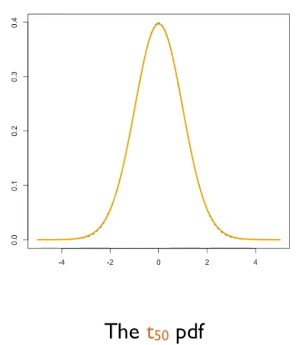

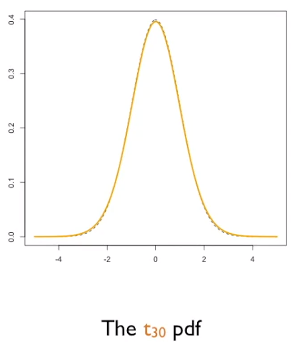

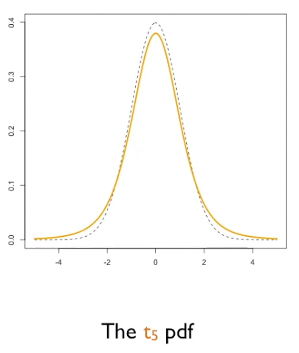

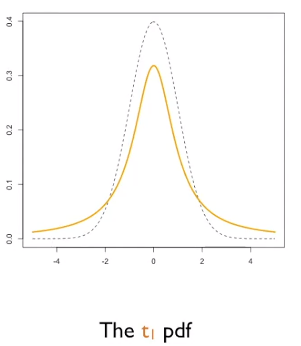

# 7. Student's T test (one sample)

Вернемся к нашей задаче - у нас маленькая выборка. и не сможем применить Wald's test. А по факту мы сипользуем тот же механизм, только главный компонент это точное знание распределения, вместо асимптотической нормальности $\hat\theta$. Но нам это далось определенной ценой - мы предполагаем что данные имеют гаусово распределение, и мы может оценить только тот параметр который у нас является $\mathbb{E}[X]$ - только среднее. тоесть наша цель тест - оценить $\mu$/

- Гуссова модель $X_1,\dots,X_n\stackrel{\text{iid}}\sim\mathcal{N}(\mu, \sigma^2)$, мы не знаем $\mu$,$\sigma$

- мы знаем $$\sqrt{b}\dfrac{\bar{N}_n-\mu}{S_n}\sim t_{n-1}, \forall n$$ знание точного распределения заменяет нужду в свойсте асимптотичсекой нормальности.

- T-Test, мы также рассмотрим 3 возможных варианта проведение теста статистики и в каждом из них мы будет использовать квантили. Но так как наша рефеернтное распределение не является гаусовым, то мы не должны удивляться что квантили замеяться с гаусовых на квантили t-distribution с $n-1$ степенями свободы.

| $$\quad\quad\quad\quad\quad\quad$$ | $$H_0: \mu=\mu_0\\ H_1: \mu\neq\mu_0$$ | $$H_0: \mu\leq\mu_0\\ H_1: \mu>\mu_0$$ | $$H_0: \mu\geq\mu_0\\ H_1: \mu<\mu_0$$ |
| --- |:---:|:---:|:---:|
| T-Test $\psi$ | $$\mathbb{1}\{|T|>q_{\alpha/2}^{t_{n-1}}\}$$ | $$\mathbb{1}\{T>q_{\alpha}^{t_{n-1}}\}$$ | $$\mathbb{1}\{T<-q_{\alpha}^{t_{n-1}}\}$$ |
|  | two sided | one sided | one sided |

$$T:=\sqrt{n}\dfrac{\bar{X}_n-\mu_0}{S_n}\quad\text{and}\quad \mathbb{P}[t_{n-1}>q_\alpha^{t_{n-1}}]=\alpha$$
Почему же мы не используем Wald's test вместо T-Test тут? Wald's test $W:=\frac{\hat\theta-\theta_0}{\color{red}{\sqrt{\widehat{\text{var}}(\hat\theta)}}}$ так как мы используем теорию Слуцкого, в качестве делителя, мы может использовать любую оценку стандартного отклонения Гуссово (standard deviation), главное что бы он была устойчивой (consistent). в этом и плюс использования теор. Слуцкого - *все что consistent - выглядит одинаково асимптотически*. 

Но так как мы хотим сделать вывод для любого конечного $n$, мы должны очень осторожно выбирать оценщик дисперсии. И тут мы должны использовать $S_n$, не предвзятый/смещенный оценщик дисперсии.\
По этому мы используем другую букву $T$, чтобы подчеркнуть разницу умежду **Wald's test** и **t-Test**

Заметим в таблице выше, мы используем те же тесты, что и в таблице Wald's test.

- Каким будет уровень теста? мы используем тот же анализ как и в Wald's test, **не-асимптотический уровень $\alpha$**


**Ветро генератор**

- $n=12,\,\bar{X}_n=14.3,\,S_n=4.7,\,\mu_0=10$\
$H_0:m\leq10$\
$H_1:m>10$
- $T=\sqrt{12}\dfrac{14.3-10}{4.7}=T^{\text{obs}}=3.17$
- Из таблицы $q_{5\%}^{t_{11}}=1.8$

$$\mathbb{1}\{T>q_{\alpha}^{t_{n-1}}\}=\mathbb{1}\{3.17>1.8\}=1$$

**Reject null hypthesis 3.17>1.80**

"УРА! ставим турбину!


# 8. P-values for the T-test


Следующий важный вопрос - как мы подсчитаем p-Value

| $$\quad\quad\quad\quad\quad\quad$$ | $$H_0: \mu=\mu_0\\ H_1: \mu\neq\mu_0$$ | $$H_0: \mu\leq\mu_0\\ H_1: \mu>\mu_0$$ | $$H_0: \mu\geq\mu_0\\ H_1: \mu<\mu_0$$ |
| --- |:---:|:---:|:---:|
| T-Test $\psi$ | $$\mathbb{1}\{|T|>q_{\alpha/2}^{t_{n-1}}\}$$ | $$\mathbb{1}\{T>q_{\alpha}^{t_{n-1}}\}$$ | $$\mathbb{1}\{T<-q_{\alpha}^{t_{n-1}}\}$$ |
|  | two sided | one sided | one sided |
| p-Value $\psi$ | $$\mathbb{P}[\{|T|>|T^{\text{obs}}|]$$ | $$\mathbb{P}[T>T^{\text{obs}}]$$ | $$\mathbb{P}[T<T^{\text{obs}}]$$ |


$T\sim t_{n-1}$

для примера с турбиной p-value=$$\mathbb{P}[t_{11}>3.17]=0.446\%$$ - очень сильные доказательства против $H_0$

The $t$-test is based on a test statistic that exactly follows a  $t$-distribution. Since the distribution that we're looking at is the exact distribution of the test statistic, we thus get non-asymptotic  $p$-values.

# 9. Comparison between the T-test and the Wald test


Сравним тесты. 

$T^{\text{obs}}=3.17$

| test | quantile | p-value | 
|:-------:|:------:|:------:|
| $$W>q_{5\%}$$ | $$q_{5\%}=1.645$$ | $$\mathbb{P}[\mathcal{N}(0,1)>3.17]$$ |
| $$T>q_{5\%}^{t_{n-1}}$$ |  $$q_{5\%}=1.8$$ | $$\mathbb{P}[t_{11}>3.17]=0.00046$$ |

Вспомним что мы может использовать T для теста W потому что T может быть асимптотически Гауссовым.

У каждого теста своя таблица квантилей.

- если бы использовали Wald's test на асимптотическом уровне 5%, мы бы сравнивали с квантилем $q_{5\%}=1.645$ и мы бы отклонили гипотезу

На рисунке ниже мы видим как критерии на много меньше чем наблюдаемые значения

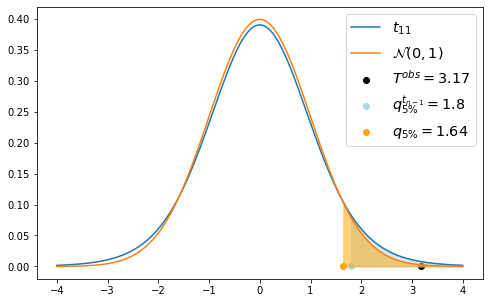


Тут хорошо видно как по краях распределений у нас меняет площадь.
![image-4.png](attachment:image-4.png)

С увеличение степеней свободы, распределение t-test - приближается к нормальному.
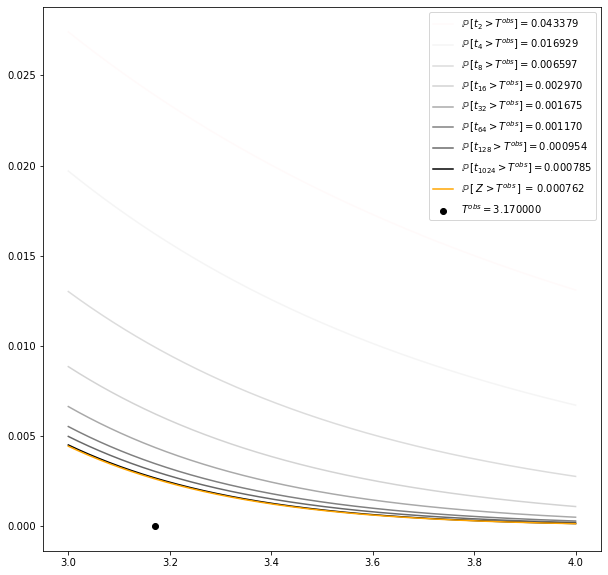

- T-Тест требует от данных выборки $X_1,\dots,X_n$ быть гауссовыми
- T-Тест можно проводить только над Ожиданием значения
- Распределение $T$ осевое/опорное/решающее,т.е.  ее квантили можно найти в таблице.
- T-Тест является "не-асимптотичным". И это для конретных значение n, мы может подсчитать уровень нашего теста, а не асимптотический уровень.
- T-Тест и Wald's test дает практически одинаковые ответы при больших n
- В общем Wald's test приводит к меньшему значению p-value чем T-Тест 


Correct answers: The Wald test leads to smaller p-values than the T-test because the tails of the Gaussian are lighter than the tails of the student's T distribution with a finite number of degrees of freedom. Also recall that the T-test requires the data to be Gaussian and that the T-test is nonasymptotic. For large  the Wald test and T-test performed on Gaussian data essentially yield the same value for their respective test statistics, by Slutsky's theorem. Finally, the T-test is only performed to test for the mean.

Incorrect answers: The Wald test is an asymptotic test and leads to asymptotic p-values. Also the Wald test does not require the data to be Gaussian or the variance to be unknown. As stated above, the T-test only tests for the mean and not the variance. On Gaussian data, the Wald and T-test statistics are essentially the same. Since the student's T distribution has larger quantiles (heavier tails) than the standard Gaussian, if the T-test rejects, then the Wald test also rejects.

# 10. Two-sample T-tests and the Welch-Satterthwaite Formula


Вспомним про наш клинический эксперимент

- $\mu_d>0$ - ожидаемое снижение LDL в тест группу, d-drug
- $\mu_c>0$ - ожидаемое снижение LDL в тест контрольной группу, c-control
- Гипотезы\
$H_0:\mu_d-\mu_c\leq0\Leftrightarrow\mu_d=\mu_c\\
H_1:\mu_d-\mu_c>0 \Leftrightarrow\mu_d>\mu_c$
- Мы наблюдаем два независимые выборки
-- $X_1,\dots,X_n\stackrel{\text{iid}}\sim\mathcal{N}(\mu_d,\sigma_d^2)$ - из тестовой группы и 
-- $X_1,\dots,X_m\stackrel{\text{iid}}\sim\mathcal{N}(\mu_c,\sigma_c^2)$ - из контрольной группы
- у нас есть 
$$\dfrac{\bar{X}_n-\bar{Y}_m-(\mu_d-\mu_c)}{\sqrt{\frac{\sigma_d^2}{n}+\frac{\sigma_c^2}{m}}}\sim\mathcal{N}(0,1)$$\
учитывается тот факт что выборки независимы, и $\bar{X}_n-\bar{Y}_m$ остается Гауссовой переменной.

Если мы хотим применить Wald test, мы для этого 
- мы не знаем $\sigma_d^2$ и  $\sigma_c^2$
- для этого мы выберем какую-то состоятельную (consisten) оценку $\hat{\sigma}_d^2$ и  $\hat{\sigma}_c^2$
- применю теор Слуцкого.
- получу асимптотическое утверждение, которое меня удовлетворит и к которому я действительно смогу применить квантили стандартного гауссовского распределения.

Но мы **не можем это сделать**, потому что у нас очень маленькая выборка, не достаточно большая чтобы применить теор. Слуцкого.

Попробуем применить **t-Test**, потому что всетаки у нас есть не смещенные оценки дисперсии выборки.

$$\dfrac{\bar{X}_n-\bar{Y}_m-(\mu_d-\mu_c)}{\sqrt{\frac{\sigma_d^2}{n}+\frac{\sigma_c^2}{m}}}
=\dfrac
    { 
        \color{orange}{
            \frac{\bar{X}_n-\bar{Y}_m-(\mu_d-\mu_c)}
                 {\sqrt{\frac{\sigma_d^2}{n}+\frac{\sigma_c^2}{m}}}
         }
    }
    {
        \color{blue}{
            \sqrt{
                \frac{
                      \frac{S_d^2}{n}+\frac     {S_c^2}{m}
                      } {
                      \frac{\sigma_d^2}{n}+\frac{\sigma_c^2}{m}
                }
             }
        }
    } =\dfrac{Z}{\sqrt{V/k}}
    $$
    
Вспомним чему равны $S_d^2=\dfrac{1}{n-1}\sum_{i=1}^n(X_i-\bar{X}_n)^2$ и
$S_с^2=\dfrac{1}{ь-1}\sum_{i=1}^m(X_i-\bar{X}_m)^2$

Хорошие новости мы знаем что $\color{orange}{\frac{\bar{X}_n-\bar{Y}_m-(\mu_d-\mu_c)}
                 {\sqrt{\frac{\sigma_d^2}{n}+\frac{\sigma_c^2}{m}}}}\sim\mathcal{N}(0,1)$\
Плохие новости - мы не знаем $\color{blue}{\sqrt{
                \frac{
                      \frac{S_d^2}{n}+\frac     {S_c^2}{m}
                      } {
                      \frac{\sigma_d^2}{n}+\frac{\sigma_c^2}{m}
                }
             }}$ зависит от $n$ $m$ и нам будет сложно найти $chi^2$  для него. Мы воспользуемся уже готовым распределением. Которой приблизительно распределено в соотв. Student распределением с $N$ степенями свободы:\
$\dfrac{\bar{X}_n-\bar{Y}_m-(\mu_d-\mu_c)}{\sqrt{\frac{S_d^2}{n}+\frac{S_c^2}{m}}}\sim t_N$

**Welch-Satterthwaite Formula**\
Где $$N=\dfrac{(S_d^2/n+S_c^2/m)^2}{\frac{S_d^4}{n^2(n-1)}+\frac{S_m^4}{m^2(m-1)}}\geq\min(n,m)$$ - эта формула не просто зависит от $n$ и $m$, она еще зависит от оцененный дисперсий. Чтобы не калькулировать эту формулу, мы можем просто быть более консервативными и взять минимальное из $n$ и $m$, что приведет к большим p-value.
Мы можем проанализировать эту формулу, не смотря на ее сложность. предположим что размер одиной из выборок идет в бесконечность, $m\to\infty$ как, то есть, как будто нам дали точное значение $\mu_c$
получается что два элемента исчезнут 
$$\dfrac{(\frac{S_d^2}{n}+\cancel{\frac{S_c^2}{m}})^2}{\frac{S_d^4}{n^2(n-1)}+\cancel{\frac{S_m^4}{m^2(m-1)}}}
=\dfrac{\frac{S_d^\color{orange}{4}}{n^2}}{\frac{S_d^4}{n^2(n-1)}}
=\frac{S_d^\color{orange}{4}}{n^2}\cdot\frac{n^2(n-1)}{S_d^4}
=\frac{\cancel{S_d^4}}{\cancel{n^2}}\cdot\frac{\cancel{n^2}(n-1)}{\cancel{S_d^4}}=n-1$$

Эта формула очень сложная и мы можем просто придерживаться более консервативного выбора $min(n,m)$, это конечно снизит шансы на открытие эффекта, но если мы готовы пожертвовать шансамы отвергнуть нуль гипотезу. то это будет правильный подход.

Если же вы хотите выжать помаксимуму из свои данных - то лучше использовать эту формулу. Можно в начале проверить простой выбор из $min(n,m)$, если  получиться отвергнуть нуль, то конечно же получиться и через формулу WS. Но если не получиться опровергнуть, то тогда можно воспользоваться WS, особенно если p-value находится на пороге с p-value.

$n=12, m=22, \bar{X}_n=156.4, \bar{Y}_m=132.7, S_d=22.5, S_c=8.7$

$$T=\dfrac{156.4-132.7}{\sqrt{\frac{22.5^2}{12}+\frac{8.7^2}{22}}}=3.51$$


используя формулу WS

$$N=\dfrac{\left(\frac{22.5^2}{12}+\frac{8.7^2}{22}\right)^2}
{\frac{22.5^4}{12^2\cdot11} + \frac{8.7^4}{22^2\cdot21}}=12.82$$ это формула дала нам не целое число, и это одна из проблем этой формулы. Мы конечно можем округлить ее до 13. Но мы вседа должны делать выбор в пользу более консервативного выбора - выбирать  меньшее число степеней свободы. то есть $N=12$

получается что тоже самое что и при выборе $12=\min(n,m)=\min(12, 22)$

Подсчитаем p-Value$=\mathcal{P}(t_{12}>3.51)=0.00215=0.215\%$ конечно мы **отклоняем нуль гипотезу, потому что нашли сильнейшие доказательства что лекарство эффективно**

# 11. Who was Student? (optional)

Кто это студент?
[William Sealy Gosset](https://en.wikipedia.org/wiki/William_Sealy_Gosset)
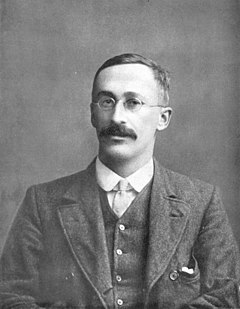

# Вопросы 

- в чем разница между  MLE и оценку среднего?
- law of the random variable?

1) Что такое Wald тест и в чем его главное преимущество по сравнению с тестами, основанными на доверительных интервалах?
2) Какие основные проблемы возникают при использовании Wald теста в контексте малых выборочных объемов?
3) Как профессор Риголле описывает использование центральной предельной теоремы (CLT) в контексте Wald теста?
4) Какие предположения делает профессор, когда говорит о необходимости заменить использование теоремы Слуцкого и CLT при малых выборках?
5) Какие статистические предпосылки используются при оценке дисперсии $S_n^2$ и почему важно использовать $n-1$ в знаменателе при ее расчете?
6) Какое распределение приписывает профессор переменной $S_n^2$ и как он объясняет связь между $\sigma^2$ и этой оценкой?
7) Каковы основные характеристики распределения хи-квадрат и когда оно возникает в контексте статистических тестов?
8) Как профессор Риголле объясняет переход от распределения хи-квадрат к t-распределению Стьюдента и при каких условиях это распределение используется?
9) Какие аспекты следует учитывать при использовании t-теста Стьюдента для малых выборок, и как это влияет на статистическую значимость результатов?
10) Как профессор Риголле сравнивает t-тест и Wald тест, и какие преимущества и недостатки каждого из этих методов он выделяет?
11) Что такое асимптотическая нормальность в контексте Wald теста и какие методы используются для её достижения?
12) Объясните, как влияет размер выборки на применимость центральной предельной теоремы и метода Дельта в статистических тестах, описываемых профессором.
13) Как профессор Риголле аргументирует необходимость предположения о нормальном распределении данных при малых выборках?
14) Какие проблемы могут возникнуть при использовании t-теста Стьюдента в случаях, когда данные не имеют нормального распределения?
15) Какие статистические предпосылки и методы оценки профессор Риголле использует для анализа вариабельности в данных?
16) Как профессор объясняет использование несмещённой оценки дисперсии и её отличие от оценки максимального правдоподобия?
17) Какие особенности распределения хи-квадрат подчеркивает профессор, и почему это распределение часто встречается в статистических тестах?
18) Какова связь между распределением хи-квадрат и t-распределением Стьюдента, как она используется при тестировании статистических гипотез?
19) Почему важно учитывать степени свободы в распределении хи-квадрат и как это влияет на результаты статистического теста?
20) Какие предложения даёт профессор по применению статистических тестов в реальных условиях, когда речь идёт о малых выборках и ранних клинических испытаниях?
21) Какие типы гипотез можно тестировать с помощью Wald теста, и что требуется для их формулировки?
22) Какие основные ограничения Wald теста упоминает профессор, особенно в контексте малых выборок?
23) Чем опорное распределение отличается от асимптотически нормального, и почему это важно при работе с малыми выборками?
24) Какие статистические подходы и предположения предлагает профессор для работы с данными, когда нельзя применять центральную предельную теорему?
25) Как профессор описывает процесс выбора и применения несмещённой оценки дисперсии в статистических расчётах?
26) Какое значение имеет параметр $\mu$ в контексте изучаемого профессором случая установки ветрогенератора, и как он связан с формулировкой гипотезы?
27) Какие проблемы возникают при оценке $\sigma^2$ , и почему это важно для понимания данных в примере с ветрогенератором?
28) Какие методы использует профессор для стандартизации гауссовской величины в контексте его статистического теста?
29) Какие практические соображения приводит профессор относительно использования статистических тестов в ранних фазах клинических испытаний?
30) Как профессор использует распределение хи-квадрат для анализа статистических данных, и что он говорит о его свойствах?

# Вопросы на Python

1) Напишите скрипт на Python для выполнения одновыборочного t-теста на реальных данных. Какие параметры вам нужно будет задать и как вы будете интерпретировать результаты?
2) Как с помощью Python можно сгенерировать данные, соответствующие нормальному распределению, и проверить, как изменение размера выборки влияет на асимптотические свойства статистики?
3) Используя Python, напишите функцию для расчёта несмещённой оценки дисперсии. Как изменится результат при различных размерах выборки?
4) Создайте скрипт на Python для визуализации распределения хи-квадрат и t-распределения Стьюдента. Как форма распределения изменяется с увеличением числа степеней свободы?
5) Используйте Python для моделирования Wald теста и сравните его с t-тестом Стьюдента на сгенерированных данных. Какие различия в результатах вы наблюдаете при малых и больших выборках?
6) Напишите Python скрипт для оценки $\mu$ и $\sigma^2$ для нормально распределённых данных. Как влияние размера выборки воздействует на точность оценок?
7) Реализуйте в Python функцию для вычисления p-значений для односторонних и двусторонних тестов с использованием t-распределения. Как можно использовать эти p-значения для принятия решений о гипотезах?
8) Создайте сценарий на Python, который моделирует использование теста с малым количеством наблюдений и применяет корректировку для малых выборок. Как корректировка влияет на статистически значимые результаты?
9) Напишите функцию на Python, которая имитирует проведение клинических испытаний с использованием t-теста Стьюдента для сравнения двух средних. Как вы будете обрабатывать результаты и какие выводы можно сделать?
10) Разработайте Python скрипт, который визуализирует влияние предположения о нормальности данных на результаты статистических тестов. Какие методы можно использовать для проверки этого предположения?

# Code

In [443]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2, t


$Z\sim\mathcal{N}(\mu, \sigma^2)$\
$T = aZ+b$\
$\mathbb{E}[T] = a\mathbb{E}[Z]+b=a\mu+b$\
$\text{var}(T)=\text{var}(aZ+b)=\text{var}(aZ)=a^2\text{var}(Z)=a^2\sigma^2$\
$T\sim\mathcal{N}(a\mu+b, a^2\sigma^2)$

допустим что 
$X\sim\mathcal{N}(\mu_x, \sigma_x^2)$,$Y\sim\mathcal{N}(\mu_y, \sigma_y^2)$\
$T=\alpha X+\beta Y$
$\mathbb{E}[T] = \mathbb{E}[\alpha X]+\mathbb{E}[\beta Y]=\alpha\mathbb{E}[X]+\beta \mathbb{E}[Y]=\alpha\mu_x+\beta \mu_y$\
$\text{var}(T)=\text{var}(\alpha X)+\text{var}(\beta Y)=\alpha ^2\text{var}(X)+\beta ^2\text{var}(Y)=\alpha ^2\sigma_X^2+\beta ^2\sigma_Y^2$\
$T\sim\mathcal{N}(\alpha\mu_x+\beta \mu_y, \alpha ^2\sigma_X^2+\beta ^2\sigma_Y^2)$


$Z \sim \mathcal{N}(5-14, 2^2+4^2)=\sim\mathcal{N}(-9, 20)$

In [587]:
np.sqrt(2**2 + 4**2)

4.47213595499958

In [2]:
# проверим если поведение разницы независимых гаусовских переменных тоже
# обладает гаусовым поведением
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2, t

mu_1, sigma_1, n  = 5, 2, 100000
mu_2, sigma_2, m  = 11, 4, 100000

x = norm.rvs(loc=mu_1, scale=sigma_1, size=n)
y = norm.rvs(loc=mu_2, scale=sigma_2, size=m)
z = x + y

fit_x_mu, fit_x_sd = norm.fit(x)
fit_x_mu, fit_x_sd = norm(fit_x_mu, fit_x_sd).stats(moments='mv')
print(f"check X mean={fit_x_mu:0.4f}, var={fit_x_sd:0.4f}")

fit_y_mu, fit_y_sd = norm.fit(y)
fit_y_mu, fit_y_sd = norm(fit_y_mu, fit_y_sd).stats(moments='mv')
print(f"check Y mean={fit_y_mu:0.4f}, var={fit_y_sd:0.4f}")

fit_z_mu, fit_z_sd = norm.fit(z)
fit_z_mu, fit_z_sd = norm(fit_z_mu, fit_z_sd).stats(moments='mv')
print(f"check Z mean={fit_z_mu:0.4f}, var={fit_z_sd:0.4f}")
print(f"{fit_x_sd+fit_y_sd}={fit_z_sd}")
mu_z = np.mean(z)
sd_z = np.std(z)
var_z = np.var(z)
print(mu_z, sd_z**2, var_z)

check X mean=5.0022, var=4.0028
check Y mean=10.9964, var=15.9524
check Z mean=15.9987, var=20.0248
19.955128198949488=20.02480052164617
15.998680722945826 20.02480052164617 20.02480052164617


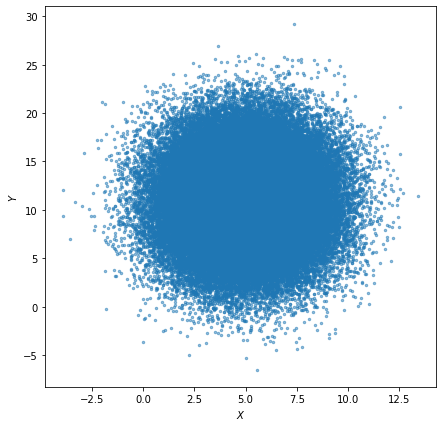

In [3]:
plt.figure(figsize=(7,7))
plt.scatter(x, y, alpha=0.5, s=6)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.show()

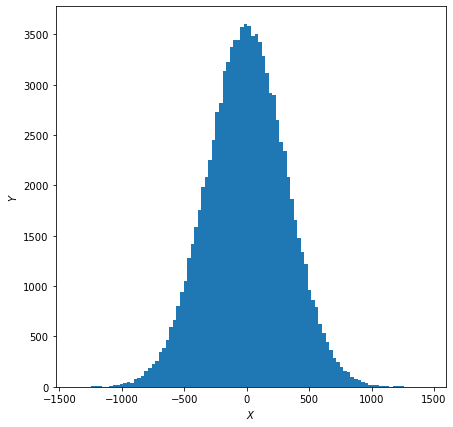

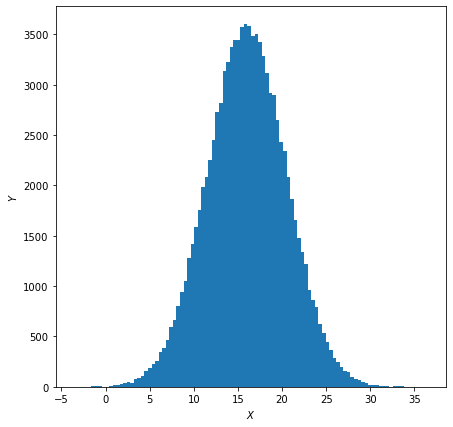

In [4]:
mu_z = np.mean(z)
sd_z = np.std(z)
z_normalized = np.sqrt(n) * ((z-mu_z)/sd_z)

plt.figure(figsize=(7,7))
plt.hist(z_normalized, bins=100)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.show()

plt.figure(figsize=(7,7))
plt.hist(z, bins=100)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.show()

Мысль.

код ниже показывает почему в теории говорят о сходимости к распределению, но имеют ввиду CDF а не PDF. Когда мы строем диаграмму PDF мы должны разделить данные на группу и их отображать в соотв с их вероятностью. увеличива количество таких групп, что тоже самое что - уменьшая размер каждой группы, мы занижаем вероятность этих значений, потому что делитель у нас при этом не меняется - остается n. Визуально мы смогли подобрать подходящиее количество групп разбиения 37. но изменив размер выборки, придется заново подбирать это число

0.99999


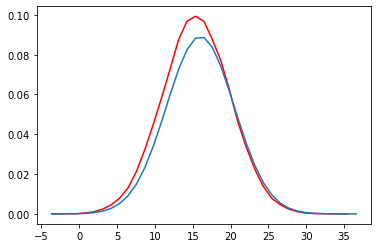

In [5]:
# PDF
bins = 37 # magic number
x_z = np.linspace(min(z), max(z), bins)
zn_sorted = np.sort(z)
zn_sorted_y = np.zeros(shape=(bins-1,))
zn_sorted_x = np.zeros(shape=(bins-1,))
for i, (a,b) in enumerate(zip(x_z[:-1],x_z[1:])):
    zn_sorted_x[i] = a
    zn_sorted_y[i] = np.sum((zn_sorted>=a)&(zn_sorted<b))/n

ytest = norm.pdf(x_z, loc=mu_z, scale=sd_z )

plt.plot(zn_sorted_x, zn_sorted_y, color='red')
plt.plot(x_z, ytest)
print(np.sum(zn_sorted_y))

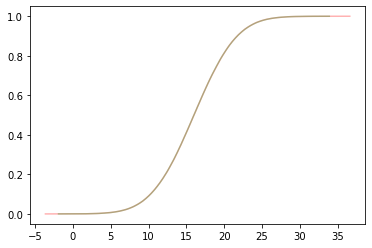

In [6]:
# CDF
x_z = np.linspace(min(z), max(z), bins)
n = len(z)

zn_sorted = np.sort(z)
zn_sorted_y = np.zeros(shape=(n,))
zn_sorted_x = np.zeros(shape=(n,))
for i, a in enumerate(zn_sorted):
    zn_sorted_x[i] = a
    zn_sorted_y[i] = np.sum((zn_sorted<a))/n

x_z = np.linspace(mu_z-4*sd_z, mu_z+4*sd_z, 1000)
ytest = norm.cdf(x_z, loc=mu_z, scale=sd_z )

plt.plot(zn_sorted_x, zn_sorted_y, color='red', alpha=0.3)
plt.plot(x_z, ytest, color='green', alpha=0.3)

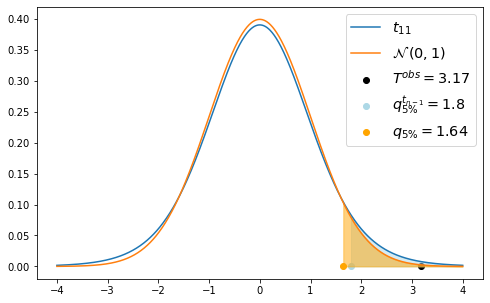

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2, t

mu, sigma = 0, 1
norm_rvs = norm(mu, sigma)
df = 11
ttest_rvs = t(df=df)
n = 100000
bins = 1000
x = np.linspace(-4, 4, bins)
alpha=0.05
t_q_alpha =  ttest_rvs.ppf(1-alpha)
n_q_alpha =  norm_rvs.ppf(1-alpha)
t_y = ttest_rvs.pdf(x)
n_y = norm_rvs.pdf(x)

z_crit=3.17

plt.figure(figsize=(8,5))
plt.plot(x, t_y, label=fr'$t_{{{df}}}$')
plt.plot(x, n_y, label=r'$\mathcal{N}\,(0,1)$')
plt.scatter(z_crit,    0, color='black', label=fr'$T^{{obs}}={z_crit:0.4}$')
plt.scatter(t_q_alpha, 0, color='lightblue', label=fr'$q_{{5\%}}^{{t_{{n-1}} }}={t_q_alpha:0.3}$')
plt.scatter(n_q_alpha, 0, color='orange', label=fr'$q_{{5\%}}={n_q_alpha:0.3}$')

plt.fill_between(x, 0, t_y, where=(x >= t_q_alpha), color='lightblue', alpha=0.5)# label="Область отклонения")
plt.fill_between(x, 0, n_y, where=(x >= n_q_alpha), color='orange',    alpha=0.5)# label="Область отклонения")
plt.legend(fontsize ='x-large')
plt.show()

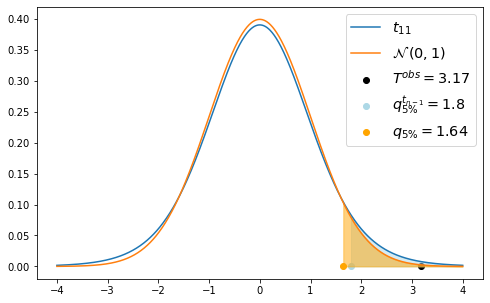

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2, t

mu, sigma = 0, 1
norm_rvs = norm(mu, sigma)
df = 11
ttest_rvs = t(df=df)
n = 100000
bins = 1000
x = np.linspace(-4, 4, bins)
alpha=0.05
t_q_alpha =  ttest_rvs.ppf(1-alpha)
n_q_alpha =  norm_rvs.ppf(1-alpha)
t_y = ttest_rvs.pdf(x)
n_y = norm_rvs.pdf(x)

z_crit=3.17

plt.figure(figsize=(8,5))
plt.plot(x, t_y, label=fr'$t_{{{df}}}$')
plt.plot(x, n_y, label=r'$\mathcal{N}\,(0,1)$')
plt.scatter(z_crit,    0, color='black', label=fr'$T^{{obs}}={z_crit:0.4}$')
plt.scatter(t_q_alpha, 0, color='lightblue', label=fr'$q_{{5\%}}^{{t_{{n-1}} }}={t_q_alpha:0.3}$')
plt.scatter(n_q_alpha, 0, color='orange', label=fr'$q_{{5\%}}={n_q_alpha:0.3}$')

plt.fill_between(x, 0, t_y, where=(x >= t_q_alpha), color='lightblue', alpha=0.5)# label="Область отклонения")
plt.fill_between(x, 0, n_y, where=(x >= n_q_alpha), color='orange',    alpha=0.5)# label="Область отклонения")
plt.legend(fontsize ='x-large')
plt.show()

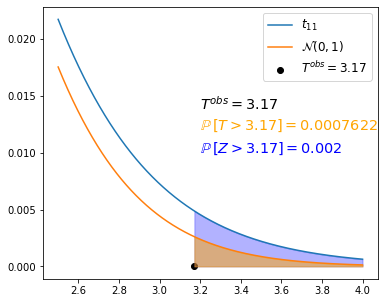

In [16]:
x = np.linspace(2.5, 4, 1000)
t_rvs = t(df=df)

t_y = t_rvs.pdf(x)
n_y = norm_rvs.pdf(x)
plt.figure(figsize=(6,5))
t_p_value = 1-t_rvs.cdf(z_crit)
n_p_value = 1-norm_rvs.cdf(z_crit)

plt.plot(x, t_y, label=r'$t_{11}$')
plt.plot(x, n_y, label=r'$\mathcal{N}(0,1)$')
plt.scatter(z_crit,    0, color='black',     label=fr'$T^{{obs}}={z_crit:0.4}$')
# plt.scatter(t_q_alpha, 0, color='lightblue', label=fr'$q_{{5\%}}^{{t_{{n-1}} }}={t_q_alpha:0.3}$')
# plt.scatter(n_q_alpha, 0, color='orange',    label=fr'$q_{{5\%}}={n_q_alpha:0.3}$')
plt.fill_between(x, 0, t_y, where=(x >= z_crit), color='blue',   alpha=0.3)#, label="Область отклонения")
plt.fill_between(x, 0, n_y, where=(x >= z_crit), color='orange', alpha=0.5)#, label="Область отклонения")
plt.text(3.2, 0.0138, fr'$T^{{obs}} ={z_crit}$',                            color='black', fontsize='x-large')
plt.text(3.2, 0.012,  fr'$\mathbb{{P}}\,[T>{z_crit}]={{{n_p_value:0.4}}}$', color='orange', fontsize='x-large')
plt.text(3.2, 0.01,   fr'$\mathbb{{P}}\,[Z>{z_crit}]={{{t_p_value:0.4}}}$', color='blue', fontsize='x-large')

plt.legend(fontsize ='large')
plt.show()

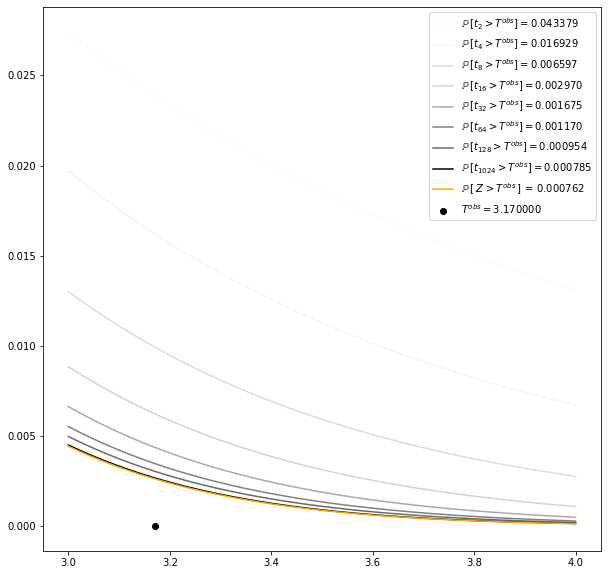

In [17]:
df = 25

ttest_rvs = t(df=df)

x = np.linspace(3, 4, 1000)
t_df = [2,4,8,16,32,64, 128, 1024]
t_colors = ['snow','whitesmoke', 'gainsboro','lightgray','darkgray','gray','dimgray','black']
n_y = norm_rvs.pdf(x)
plt.figure(figsize=(10,10))
t_p_value = 1-t_rvs.cdf(z_crit)
n_p_value = 1-norm_rvs.cdf(z_crit)
for df, c in zip(t_df,t_colors):
    t_df_rvs = t(df=df)
    t_df_p_value = 1 - t_df_rvs.cdf(z_crit)
    plt.plot(x, t_df_rvs.pdf(x), label=fr'$\mathbb{{P}}\,[t_{{{df}}}>T^{{obs}}]={{{t_df_p_value:0.6f}}}$', color=c)
plt.plot(x, n_y, label=fr'$\mathbb{{P}}\,[\,Z\,>T^{{obs}}\,]\,=\,{{{n_p_value:0.6f}}}$', color='orange')
plt.scatter(z_crit,    0, color='black',     label=fr'$T^{{obs}}={z_crit:0.6f}$')

plt.legend(fontsize ='medium')
plt.show()

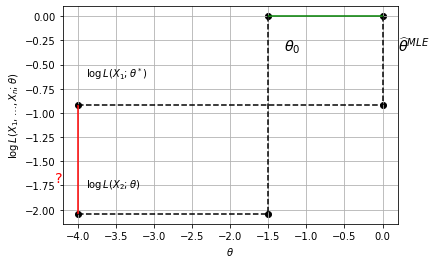

In [18]:
x_1 = -1.5
x_2 =  0
lines = [x_1,x_2]

plt.vlines(lines, ymin=[0,0],ymax= np.log(norm.pdf(lines)), color='black', linestyles='dashed')
plt.hlines(np.log(norm.pdf(lines)), xmin=[-4,-4], xmax=lines, color='black', linestyles='dashed')
plt.hlines(0, xmin=x_1, xmax=x_2, color='green')
plt.scatter([x_1,x_2,x_1,x_2, -4,-4],[0,0, np.log(norm.pdf(x_1)), np.log(norm.pdf(x_2)), np.log(norm.pdf(x_1)), np.log(norm.pdf(x_2))], color='black')
plt.vlines(-4, ymin=np.log(norm.pdf(x_1)),ymax= np.log(norm.pdf(x_2)), color='red', linestyles='solid')
plt.text(-4.3,  np.log(0.18), '?', color="red", fontdict={"fontsize":'x-large'})
plt.text(0.2,   np.log(0.7),   r'$\widehat{\theta}^{MLE}$', fontdict={"fontsize":'x-large'})
plt.text(-1.3,  np.log(0.7),   r'$\theta_0$', fontdict={"fontsize":'x-large'})
plt.text(-3.9,  np.log(0.53),  r'$\log L(X_1;\theta^*)$')
plt.text(-3.9,  np.log(0.170), r'$\log L(X_2;\theta)$')
plt.ylabel(r'$\log L(X_1,\dots,X_n;\theta)$')
plt.xlabel(r'$\theta$')
plt.grid(True)
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2, t

mu, sigma = 0, 1
norm_rvs = norm(mu, sigma)

0.9545344


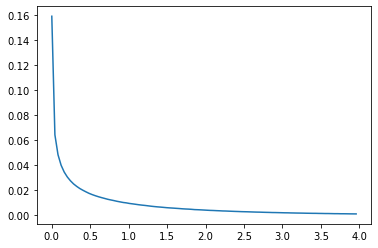

In [20]:
n = 10000000
bins = 100
x = np.linspace(0, 4, bins)
chi = norm_rvs.rvs(size=n)**2
chi = np.sort(chi)
chi_y = np.zeros(shape=(bins-1,))
chi_x = np.zeros(shape=(bins-1,))
for i, (a,b) in enumerate(zip(x[:-1],x[1:])):
    chi_y[i] = np.sum((chi>=a)&(chi<b))/n
    chi_x[i] = a
plt.plot(chi_x, chi_y)
print(np.sum(chi_y))

In [21]:
chi2.pdf(0.3, df=1)

0.6269100992275208

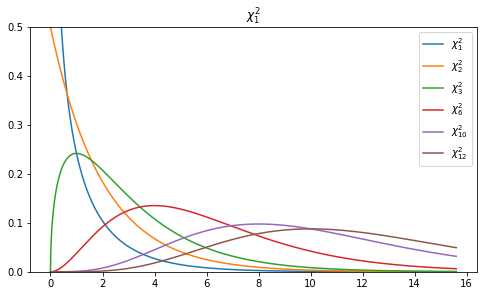

In [22]:
bins = 10000

plt.figure(figsize=(8, 4.5))
plt.title(r'$\chi_1^2$')
dfs = [1,2,3, 6, 10, 12, ]
x = np.linspace(0.00001, np.max(dfs)*1.3, bins)
for df in dfs:
    y = chi2.pdf(x, df=df)
    plt.plot(x, y, label=f"$\chi_{{{df}}}^2$")
plt.ylim(0, 0.5)
plt.legend()
plt.show()

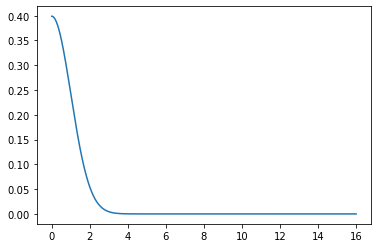

In [23]:
bins = 10000
x = np.linspace(0, 4, bins)

plt.plot(x**2, norm.pdf(x**2))

In [24]:
chi_x[-50]

1.97979797979798

In [25]:
chi

array([2.22945647e-15, 7.42720031e-15, 1.23254336e-14, ...,
       2.53391955e+01, 2.69907410e+01, 2.72488665e+01])

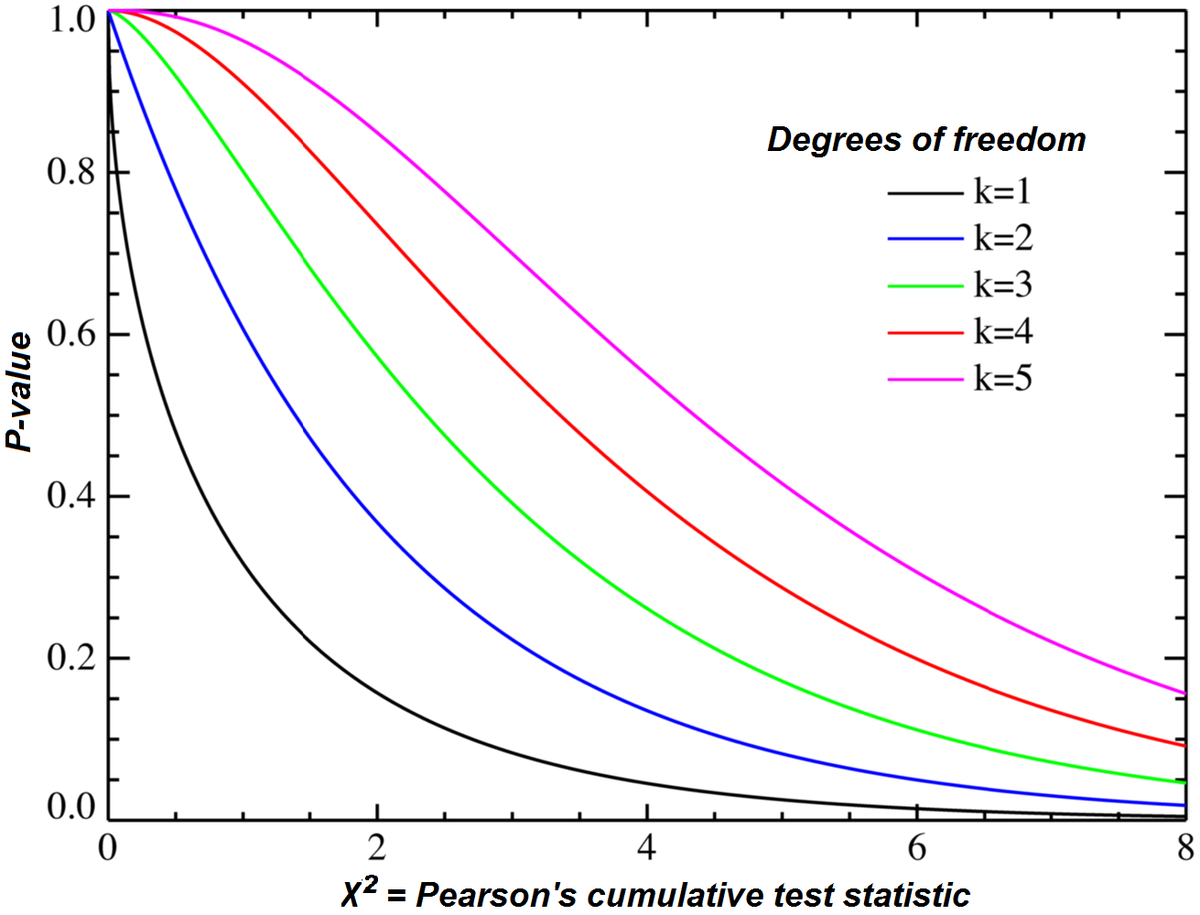

In [26]:
probs = np.linspace(0.000001, 1, 1000)
x = norm_rvs.rvs(probs)

ValueError: maximum supported dimension for an ndarray is 32, found 1000

ValueError: x and y must have same first dimension, but have shapes (10000,) and (1000,)

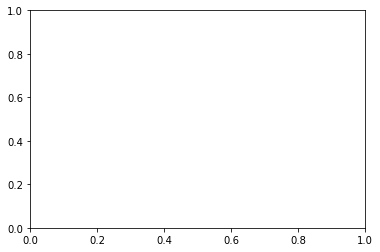

In [27]:
plt.plot(x, probs)

In [28]:
x = np.linspace(0, 2, 1000)
x = x**2
# norm_rv = norm(0, 1)

plt.plot(x**2, norm_rv.pdf(x)*2)

NameError: name 'norm_rv' is not defined

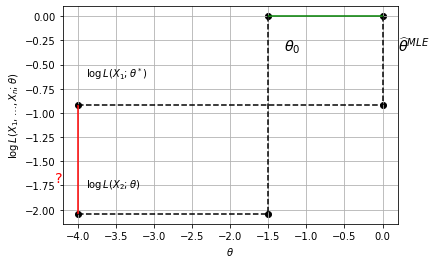

In [29]:
x_1 = -1.5
x_2 =  0
lines = [x_1,x_2]

plt.vlines(lines, ymin=[0,0],ymax= np.log(norm.pdf(lines)), color='black', linestyles='dashed')
plt.hlines(np.log(norm.pdf(lines)), xmin=[-4,-4], xmax=lines, color='black', linestyles='dashed')
plt.hlines(0, xmin=x_1, xmax=x_2, color='green')
plt.scatter([x_1,x_2,x_1,x_2, -4,-4],[0,0, np.log(norm.pdf(x_1)), np.log(norm.pdf(x_2)), np.log(norm.pdf(x_1)), np.log(norm.pdf(x_2))], color='black')
plt.vlines(-4, ymin=np.log(norm.pdf(x_1)),ymax= np.log(norm.pdf(x_2)), color='red', linestyles='solid')
plt.text(-4.3,  np.log(0.18), '?', color="red", fontdict={"fontsize":'x-large'})
plt.text(0.2,   np.log(0.7),   r'$\widehat{\theta}^{MLE}$', fontdict={"fontsize":'x-large'})
plt.text(-1.3,  np.log(0.7),   r'$\theta_0$', fontdict={"fontsize":'x-large'})
plt.text(-3.9,  np.log(0.53),  r'$\log L(X_1;\theta^*)$')
plt.text(-3.9,  np.log(0.170), r'$\log L(X_2;\theta)$')
plt.ylabel(r'$\log L(X_1,\dots,X_n;\theta)$')
plt.xlabel(r'$\theta$')
plt.grid(True)
plt.show()

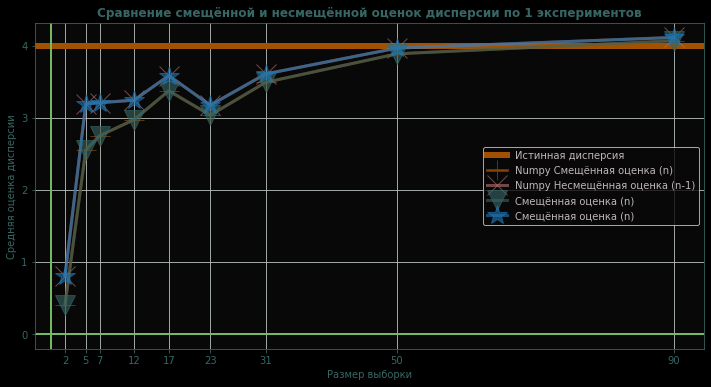

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Зададим размеры выборки и количество экспериментов
n_sizes = [2, 5, 7, 12, 17, 23, 31, 50, 90]
num_experiments = 1
num_experiments = 1
np.random.seed(42)

# Генерируем данные
true_variance = 4.0  # Истинная дисперсия нормального распределения

results_biased   = []
results_unbiased = []
results_manual_biased   = []
results_manual_unbiased = []

for n in n_sizes:
    biased_var_estimates   = []
    unbiased_var_estimates = []
    manual_biased_var_estimates   = []
    manual_unbiased_var_estimates = []
    for _ in range(num_experiments):
        sample = np.random.normal(loc=10, scale=np.sqrt(true_variance), size=n)
        mean = np.mean(sample)
        # подсчитываем дисперсию из данных
        manual_biased_variance   = np.sum((sample-mean)**2)/(len(sample)-0)
        manual_unbiased_variance = np.sum((sample-mean)**2)/(len(sample)-1)
        biased_variance   = np.var(sample, ddof=0)
        unbiased_variance = np.var(sample, ddof=1)
        
        biased_var_estimates.append(biased_variance)
        unbiased_var_estimates.append(unbiased_variance)
        manual_biased_var_estimates.append(manual_biased_variance)
        manual_unbiased_var_estimates.append(manual_unbiased_variance)
    
    results_biased  .append(np.mean(biased_var_estimates  ))
    results_unbiased.append(np.mean(unbiased_var_estimates))
    results_manual_biased  .append(np.mean(manual_biased_var_estimates  ))
    results_manual_unbiased.append(np.mean(manual_unbiased_var_estimates))

# Визуализируем результаты
f_d ={ 'size':'12', 'weight':'bold'}

plt.figure(figsize=(12, 6))
plt.axhline(y=true_variance, color='#a25103', label='Истинная дисперсия', linewidth=6)
plt.plot(n_sizes, results_biased,          label='Numpy Смещённая оценка (n)',     marker='+', alpha=0.6, color='#a25103', markersize=20, linewidth=3)
plt.plot(n_sizes, results_unbiased,        label='Numpy Несмещённая оценка (n-1)', marker='x', alpha=0.6, color="#b67371", markersize=20, linewidth=3)
plt.plot(n_sizes, results_manual_biased,   label='Смещённая оценка (n)',           marker='v', alpha=0.6, color='#376765', markersize=20, linewidth=3)
plt.plot(n_sizes, results_manual_unbiased, label='Смещённая оценка (n)',           marker='*', alpha=0.6, markersize=20, linewidth=3)
plt.xlabel('Размер выборки')
plt.ylabel('Средняя оценка дисперсии')
# plt.title(f'Сравнение смещённой и несмещённой оценок дисперсии по {num_experiments} эксперименту')
plt.title(f'Сравнение смещённой и несмещённой оценок дисперсии по {num_experiments} экспериментов', color="#376765", fontdict=f_d)
plt.xticks(n_sizes)

legend = plt.legend()
# legend.get_frame().set_alpha(0)
legend.get_frame().set_facecolor("#090809")
legend.get_frame().set_facecolor("#090809")
for text in legend.get_texts():
    text.set_color("#bfb6b8")
# plt.xscale('log')
ax = plt.gca()
ax.set_facecolor('#090809')
plt.axhline(0, color='#76b864', linewidth=2)
plt.axvline(mu, color='#76b864', linewidth=2)
plt.grid(True, color="#c4ccc8")

# mech style
ax = plt.gca()
ax.set_facecolor('#090809')
ax.spines['bottom'].set_color('#376765')
ax.spines['left'].set_color('#376765')
ax.spines['right'].set_color('#376765')
ax.spines['top'].set_color('#376765')
ax.xaxis.label.set_color('#376765')
ax.yaxis.label.set_color('#376765')
ax.tick_params(axis='x', colors='#376765')
ax.tick_params(axis='y', colors='#376765')

plt.show()

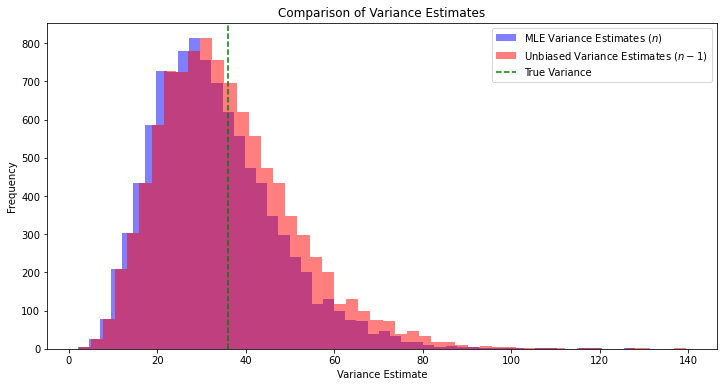

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных: 1000 выборок по 10 наблюдений из нормального распределения
np.random.seed(0)
number_of_experiments = 10000
sample_size = 12
mean = 100
true_variance = 36
data = np.random.normal(loc=mean, scale=np.sqrt(true_variance), size=(number_of_experiments, sample_size))

# Расчет MLE оценки дисперсии
mle_variances =      np.var(data, axis=1, ddof=0)
# Расчет несмещенной оценки дисперсии
unbiased_variances = np.var(data, axis=1, ddof=1)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.hist(mle_variances,      bins=50, alpha=0.5, label='MLE Variance Estimates ($n$)',        color='blue')
plt.hist(unbiased_variances, bins=50, alpha=0.5, label='Unbiased Variance Estimates ($n-1$)', color='red')
plt.axvline(x=true_variance, color='green', linestyle='--', label='True Variance')
plt.xlabel('Variance Estimate')
plt.ylabel('Frequency')
plt.title('Comparison of Variance Estimates')
plt.legend()
plt.show()


# Links

- https://en.wikipedia.org/wiki/Bessel%27s_correction
- https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/simulation-showing-bias-in-sample-variance
- https://math.stackexchange.com/questions/1397427/existence-of-the-law-of-a-random-variable
- https://stats.stackexchange.com/questions/188314/chi-squared-with-too-many-degrees-of-freedom

In [409]:
# finished 23:29:57 2024-04-18